Clustering simulated sequences using TMRCA

Name: CQS21 
FYP 2024

In [2]:
# installing packages to my python environment
# NOTE: my pip is v22.0.4 but I cant seem to update to the newest 24.0

#!pip install zarr
#!pip install scipy
#!pip install scikit-allel
#!pip install matplotlib
#!pip install tqdm
#!pip install dask
#!pip install seaborn
#!pip install tskit
#!pip install msprime
#!pip install pyslim

global genome_length
genome_length =70000
global mutation
mutation = int((genome_length+1)/2) 
global threshold
threshold = 0.87  #setting threshold to calculate trough points in each haplotype
global points
points=280
global window 
window=600

  Using cached msprime-1.3.1.tar.gz (888 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached newick-1.9.0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached demes-0.2.3-py3-none-any.whl.metadata (1.9 kB)
  Using cached ruamel.yaml-0.18.6-py3-none-any.whl.metadata (23 kB)
  Using cached ruamel.yaml.clib-0.2.8-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
Using cached demes-0.2.3-py3-none-any.whl (40 kB)
Using cached newick-1.9.0-py2.py3-none-any.whl (15 kB)
Using cached ruamel.yaml-0.18.6-py3-none-any.whl (117 kB)
Using cached ruamel.yaml.clib-0.2.8-cp310-cp310-win_amd64.whl (117 kB)
Failed to build msprime


  error: subprocess-exited-with-error
  
  × Building wheel for msprime (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [73 lines of output]
      <string>:27: UserWarning: Error occured getting GSL path config: [WinError 2] The system cannot find the file specified
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\msprime
      copying msprime\ancestry.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\cli.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\core.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\demography.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\intervals.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\likelihood.py -> build\lib.win-amd64-cpython-310\msprime
      copying msprime\mutations.py -> build\lib.win-amd64-cpython

In [1]:
# Import modules
import numpy as np
import zarr
import allel   
#idk why but my allel doesnt seem to load?? even though ive definitely installed it as scikit-allel
import scipy.cluster.hierarchy as sch
import scipy.spatial
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal
from scipy.ndimage import gaussian_filter1d
from numpy.lib.stride_tricks import sliding_window_view
from tqdm import tqdm
import dask
from dask.delayed import delayed
from dask.base import compute
from itertools import combinations
import time
import seaborn as sns
import sys
import tskit

Step 4. Estimate n hat by counting number of origins in dendrogram
I think has to be done manually... have not solved how to get it done with python

do it for each and then record in the results.csv

# count number of origins (haplotypes) for all files and save in a list

def sum_origins (number_of_files, files):
    '''
    takes the number of simulations, the .vcf files and 
    calculates the number of origins per simulation and saves it in a list.


    returns:

    '''
    # search if can use sch.dendrogram to get number of haplotype origins 
    origins = []
    for i in range (number_of_files):
        read.file ( file + i + .TREES) as file: 

            #if _________ =___________:
                #calculate  number of origins as file_origins
        #attach file_origins to origins
    return print (origins)

    

Step 5. Calculate Ne hat by maximum likelihood estimation



      N     ln(L)
0   100  0.000000
1   100  0.693147
2   100  1.098612
3   100  1.386294
4   100  1.609438
5   100  1.791759
6   100  1.945910
7   100  2.079442
8   100  2.197225
9   100  2.302585
10  100  2.397895
11  100  2.484907


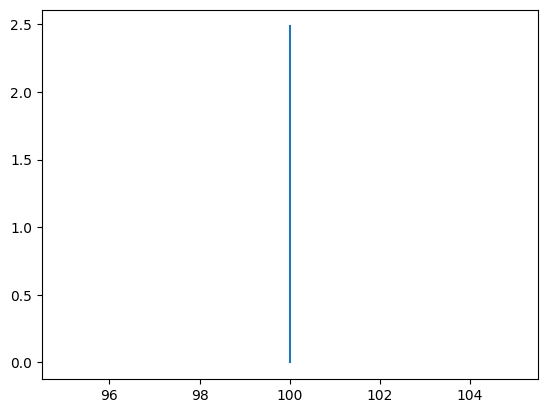

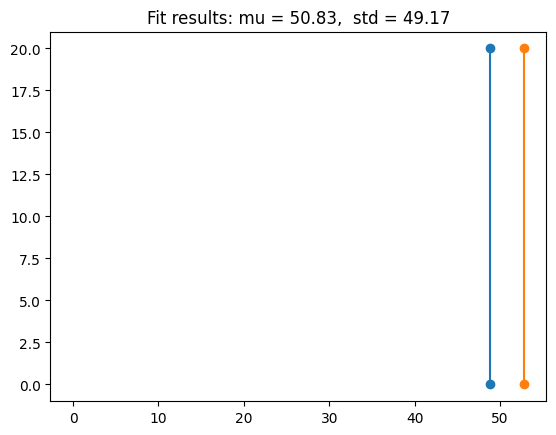

NeLow, NeHigh:48.87283661944587,52.792764588525976


(48.87283661944587, 52.792764588525976, 50.83280060398592)

In [1]:
#plot all estimated numbers of origins

# find a function that plots and finds maximum likelihood and the 95% confidence intervals
# calculating confidence interval by 
# 1. log ne hat and find maximum which should be the maximum of the graph as well
# average(origins) ?

import pandas as pd

def NeHat():
    '''
    This function plots the number of independent gene loci/origins (L) against population size (N). It also tells us NeHat (the mean), and the 95% confidence intervals.
    Do we just do the confidence intervals per N? 
    
    Arguments:
        csv_file_path: filepath of the results.csv used to manually record down the number of origins per simulation
        
    Returns:
        NeLow: lower point of 95% confidence intervals of NeHat being correct
        NeHigh: higher point of 95% confidence intervals of NeHat being correct
        NeHat: NeHat (at ln(Lmax))

    ''' 
    #load modules
    import pandas as pd
    import numpy as np
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    import scipy

    #load csv
    origins = pd.read_csv('simulations/results.csv')


    # log the heterozygosity (ln(L))
    origins["ln(L)"] = np.log(origins['origins'])
    
    # At max ln(L), is Ne Hat
    #Lmax = origins['origins'].max()
    #ln_Lmax = np.log(Lmax) 
    
    # at [ln(Lmax)-2], Nelow and NeHigh are the confidence intervals
    #confidence_cutoff = ln_Lmax -2 
    #NeLow =       ##how to find best fit line and intersection?

    
    # load input variables from a file
    data =origins[['N','ln(L)']].copy()

    #subset by N and then loop through each 
    size_100 = data[(data["N"] == 100)]
    size_1000 = data[(data["N"] == 1000)]
    size_10000 = data[(data["N"] == 10000)]
    print (size_100)                                            
    
    # Fit a normal distribution to the data:
    mean, std = norm.fit(size_100)
    NeHat = mean #NeHat is the mean

    # get confidence intervals
    ci = scipy.stats.norm.interval(0.95, loc=mean, scale=1) #gets Confidence interval with equal areas around the mean
    #print(ci)

    # Plot 
    plt.plot(size_100['N'], size_100['ln(L)'] )
    plt.show()

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
    # confidence interval left line
    one_x12, one_y12 = [ci[0],ci[0]], [0, 20]
    # confidence interval right line
    two_x12, two_y12 = [ci[1],ci[1]], [0, 20]
    plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
    plt.title(title)

    plt.show()

    NeLow = ci[0]
    NeHigh = ci[1]
    print ('NeLow, NeHigh:' + str(NeLow) + "," + str(NeHigh))

    # plot to look at confidence intervals, NeHat
    #Lmax = max (df['Heterozygosity'])
    #ln_Lmax = np.log(Lmax) 
    #plt.plot('cycle','Heterozygosity', data = df)
    #plt.axhline(y =ln_Lmax, color='r', linestyle='-') #ln_Lmax
    #plt.axhline(y=confidence_cutoff, color='r', linestyle='-') #confidence interval cutoff
    #plt.show()


    return NeLow, NeHigh, NeHat

NeHat()